# Sunce i Mesec

In [1]:
import ephem
import numpy as np
import matplotlib.pyplot as plt
import astropy as ap

## Sunce

##### 1. Podesiti posmatraca tako da se nalazi u Beogradu (geografske koordinate u stepenima su 44.8125N i 20.4612E) i da mu je vreme posmatranja datum i vreme pocetka odrzavanja ovih vezbi. U ovoj vezbi  ce definisani posmatrac da se bavi Suncem, stoga je potrebno definisati i Sunce za naseg posmatraca.

In [3]:
posmatrac = ephem.Observer()
posmatrac.lat, posmatrac.lon = '44.8125', '20.4612'
date = ephem.Date('2023/11/17 10:00')
posmatrac.date = date
#posmatrac.date = ephem.localtime(date)
print(posmatrac.date)

sun = ephem.Sun()
sun.compute(posmatrac)

2023/11/17 10:00:00


##### 2. Odrediti vreme prethodnog izlaska Sunca, vreme lokalnog podneva i vreme zalaska (rising, transit, setting) Sunca za taj datum u lokalnom vremenu (localtime) i odstampati u formatu hh:mm:ss.

In [4]:
print(ephem.localtime(posmatrac.previous_rising(sun)))
print(ephem.localtime(posmatrac.previous_transit(sun)))
print(ephem.localtime(posmatrac.next_setting(sun)))

2023-11-17 06:37:01.850228
2023-11-16 11:22:51.383222
2023-11-17 16:08:36.407918


In [13]:
print(ephem.localtime(posmatrac.previous_rising(sun)))
print(ephem.localtime(posmatrac.previous_transit(sun)))
print(ephem.localtime(posmatrac.next_setting(sun)))

2024-11-30 06:54:18.048525
2024-11-29 11:26:34.897372
2024-11-30 15:59:17.906622


##### 3. U prethodnom zadatku vidimo da Sunce nije tacno u 12 casova na najvecem polozaju u toku dana (izuzev par dana u godini). Ovo je posledica sto se za merenje vremena koristi srednje solarno vreme koje usrednjava kretanje Sunca u toku godine. Pravo prividno kretanje Sunca u toku godine zavisi od nagiba Zemljine ose i od eksentriciteta Zemljine orbite oko Sunca, te nije sasvim uniformno. Kriva koja prikazuje odstupanje vremena kada se Sunce zapravo nalazi na najvisem polozaju od podneva mereno srednjim solarim vremenom se naziva jednacinom vremena (eng. Equation of Time). Prikazati datu zavisnost u toku cele ove godine. Kriva se moze prikazati i u lokalnom vremenu (tada  ce postojati dva skoka kao posledica letnjeg/zimskom merenja vremena).

In [5]:
sun = ephem.Sun()
sun.compute(posmatrac)
d = ephem.Date('2023/11/17 10:00')
kriva = []
datum = []
for i in range(365):
    d += 1
    posmatrac.date = d
    sun.compute(posmatrac)
    a = float(ephem.localtime(posmatrac.previous_transit(sun)).time().hour)
    b = float(ephem.localtime(posmatrac.previous_transit(sun)).time().minute) / 60
    c = float(ephem.localtime(posmatrac.previous_transit(sun)).time().second) /(60*60) 
    x = a + b + c
    datum.append(i)
    kriva.append(x)


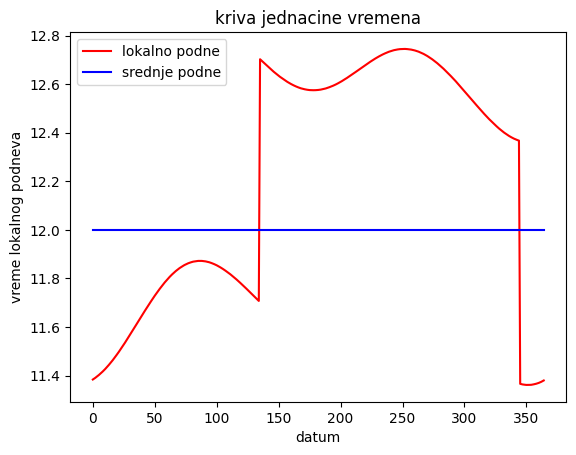

In [6]:
plt.figure()
plt.title('kriva jednacine vremena')
plt.plot(datum, kriva, color = 'r', label = 'lokalno podne')
plt.plot(datum, [12]*len(datum), color = 'b', label = 'srednje podne')

plt.xlabel('datum')
plt.ylabel('vreme lokalnog podneva')
plt.legend()
plt.show()

##### 4. Ukoliko bismo pratili poloˇzaj Sunca u taˇcno isto (lokalno) vreme tokom cele jedne godine, ona bi opisa- la petlju poznatu kao analema. Prikazati analemu koja bi se dobila posmatraju ́ci Sunce svakog dana u 12:00:00 iz Beograda. Na grafiku ubeleˇziti taˇcke prole ́cne i jesenje ravnodnevnice, kratkodnevnice i dugod- nevnice. Na drugom i tre ́cem grafiku zasebno nacrtati analemu koja odgovara posmatranjima u 08:00:00 i 15:30:00 po lokalnom vremenu.

In [7]:
sun = ephem.Sun()
sun.compute(posmatrac)
d = ephem.Date('2023/11/17 12:00')
visina = []
azimut = []
for i in range(365):
    d += 1
    posmatrac.date = d
    sun.compute(posmatrac)
    azimut.append(sun.az)
    visina.append(sun.alt)

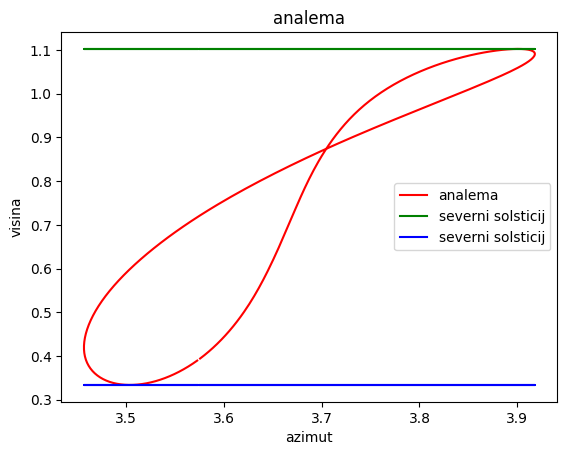

In [8]:
plt.figure()
plt.title('analema')
plt.plot(azimut, visina, color = 'r', label = 'analema')
plt.plot(azimut, [max(visina)]*len(azimut), color = 'g',label = 'severni solsticij')
plt.plot(azimut, [min(visina)]*len(azimut), color = 'b',label = 'severni solsticij')


plt.xlabel('azimut')
plt.ylabel('visina')
plt.legend()
plt.show()

##### 5. Postoje razliciti tipovi sumraka pri zalasku Sunca, a definisu se posmatrajuci pod kojim uglom se Sunce nalazi ispod horizonta. Najpre imamo civilni sumrak kada je Sunce izmedju 0 i 6 stepeni ispod horizonta, zatim sledi nauticki mrak izmedu 6 i 12 stepeni, pa astronomski mrak izmedju 12 i 18 stepeni, a kada se Sunce nadje na 18 ili vise stepeni ispod horizonta, tada otpocinje noc. Paket pyephem koristi krajnju ivicu prividnog Sunca za racunanje zalaska, dok se standardne definicije mahom baziraju na centar Sunca (opcija use center=True). Odrediti i odstampati vremena zalaska za obe definicije i razliku u vremenu izmedju njih.

In [9]:
sun = ephem.Sun()
sun.compute(posmatrac)
posmatrac.date = posmatrac.next_setting(sun,start ='2023/12/1')
x = sun.alt
print(x)

posmatrac.date = posmatrac.next_setting(sun,start ='2023/12/1',use_center=True)
y = sun.alt
print(sun.alt)
print(x-y)

-0:16:13.1
0:00:00.1
-0.004718470812292708


##### 6. Nacrtati sve oblasti sumraka u Beogradu (po lokalnom vremenu), gde su na y-osi vremena u toku jednog dana, a na x-osi meseci u tekucoj godini.

In [20]:
sun = ephem.Sun()
sun.compute(posmatrac)
d = ephem.Date('2023/12/1 10:00')
kriva1 = []
kriva2 = []
kriva3 = []
datum = []

for i in range(365):
    d += 1
    posmatrac.date = d
    posmatrac.horizon = '-6'
    sun.compute(posmatrac)
    a = float(ephem.localtime(posmatrac.next_setting(sun,use_center=True)).time().hour)
    b = float(ephem.localtime(posmatrac.next_setting(sun,use_center=True)).time().minute) / 60
    c = float(ephem.localtime(posmatrac.next_setting(sun,use_center=True)).time().second) /(60*60) 
    x = a + b + c
    posmatrac.horizon = '-12'
    sun.compute(posmatrac)
    a = float(ephem.localtime(posmatrac.next_setting(sun,use_center=True)).time().hour)
    b = float(ephem.localtime(posmatrac.next_setting(sun,use_center=True)).time().minute) / 60
    c = float(ephem.localtime(posmatrac.next_setting(sun,use_center=True)).time().second) /(60*60) 
    y = a + b + c
    posmatrac.horizon = '-18'
    sun.compute(posmatrac)
    a = float(ephem.localtime(posmatrac.next_setting(sun,use_center=True)).time().hour)
    b = float(ephem.localtime(posmatrac.next_setting(sun,use_center=True)).time().minute) / 60
    c = float(ephem.localtime(posmatrac.next_setting(sun,use_center=True)).time().second) /(60*60) 
    z = a + b + c
    datum.append(i)
    kriva1.append(x)
    kriva2.append(y)
    kriva3.append(z)

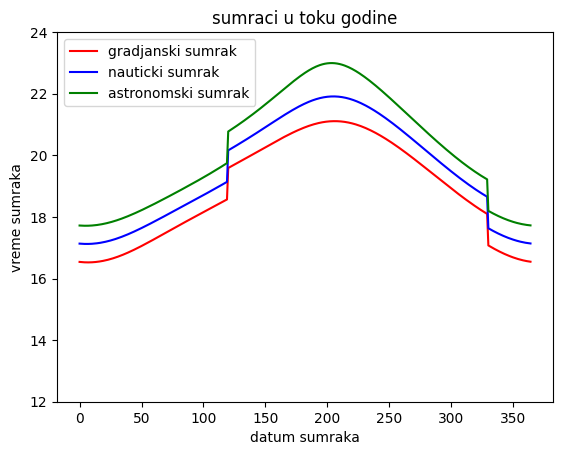

In [21]:
plt.figure()
plt.title('sumraci u toku godine')
plt.plot(datum, kriva1, color = 'r', label = 'gradjanski sumrak')
plt.plot(datum, kriva2, color = 'b', label = 'nauticki sumrak')
plt.plot(datum, kriva3, color = 'g', label = 'astronomski sumrak')



plt.ylim(12,24)
plt.xlabel('datum sumraka')
plt.ylabel('vreme sumraka')
plt.legend()
plt.show()

##### 7. Nacrtati isti grafik kao u prethodnom zadatku za Sankt Petersburg. Kako se sumraci razlikuju u odnosu na Beograd?

In [5]:
posmatrac = ephem.Observer()
posmatrac.lat, posmatrac.lon = '59.937500', '30.308611'
date = ephem.Date('2023/12/11 10:00')
posmatrac.date = date

sun = ephem.Sun()
sun.compute(posmatrac)
d = ephem.Date('2023/12/11 10:00')
kriva1 = []
kriva2 = []
kriva3 = []
datum = []

for i in range(365):
    d += 1
    posmatrac.date = d
    posmatrac.horizon = '-6'
    sun.compute(posmatrac)
    a = float(ephem.localtime(posmatrac.next_setting(sun,use_center=True)).time().hour)
    b = float(ephem.localtime(posmatrac.next_setting(sun,use_center=True)).time().minute) / 60
    c = float(ephem.localtime(posmatrac.next_setting(sun,use_center=True)).time().second) /(60*60) 
    x = a + b + c
    # posmatrac.horizon = '-12'
    # sun.compute(posmatrac)
    # a = float(ephem.localtime(posmatrac.next_setting(sun,use_center=True)).time().hour)
    # b = float(ephem.localtime(posmatrac.next_setting(sun,use_center=True)).time().minute) / 60
    # c = float(ephem.localtime(posmatrac.next_setting(sun,use_center=True)).time().second) /(60*60)
    # y = a + b + c
    # posmatrac.horizon = '-18'
    # sun.compute(posmatrac)
    # a = float(ephem.localtime(posmatrac.next_setting(sun,use_center=True)).time().hour)
    # b = float(ephem.localtime(posmatrac.next_setting(sun,use_center=True)).time().minute) / 60
    # c = float(ephem.localtime(posmatrac.next_setting(sun,use_center=True)).time().second) /(60*60) 
    # z = a + b + c
    datum.append(i)
    kriva1.append(x)
    # kriva2.append(y)
    # kriva3.append(z)

ima samo gradjanski sumrak zbog svoje geografske sirine


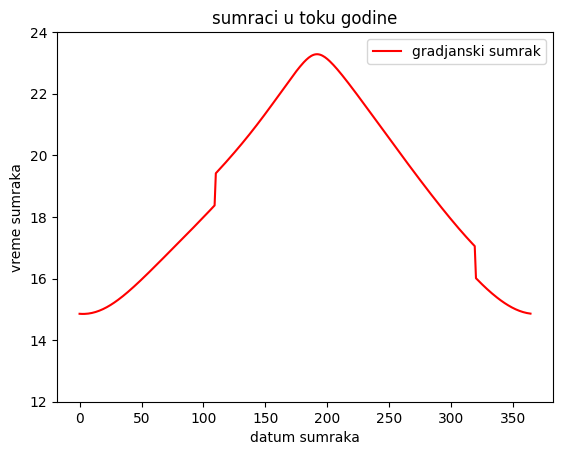

In [7]:
plt.figure()
plt.title('sumraci u toku godine')
plt.plot(datum, kriva1, color = 'r', label = 'gradjanski sumrak')
#plt.plot(datum, kriva2, color = 'b', label = 'nauticki sumrak')
#plt.plot(datum, kriva3, color = 'g', label = 'astronomski sumrak')

print("ima samo gradjanski sumrak zbog svoje geografske sirine")

plt.ylim(12,24)
plt.xlabel('datum sumraka')
plt.ylabel('vreme sumraka')
plt.legend()
plt.show()


##### 8. Uzimajuci da zalazak Sunca traje od prvog kontakta donjeg ruba Suncevog diska sa horizontom do poslednjeg kontakta gornjeg ruba sa horizontom, odrediti duzinu trajanja zalaska Sunca iz Beograda za danasnji datum i odstampati. Potom nacrtati grafik trajanja zalaska Sunca u toku citave tekuce godine (za Beograd).

In [8]:
posmatrac = ephem.Observer()
posmatrac.lat, posmatrac.lon = '44.8125', '20.4612'
date = ephem.Date('2023/12/11 10:00')
posmatrac.date = date

sun = ephem.Sun()
sun.compute(posmatrac)
d = ephem.Date('2023/12/11 10:00')
kriva1 = []
datum = []

for i in range(365):
    d += 1
    posmatrac.date = d
    size = sun.size/7200
    posmatrac.horizon = size
    sun.compute(posmatrac)
    a = float(ephem.localtime(posmatrac.next_setting(sun,use_center=True)).time().hour)
    b = float(ephem.localtime(posmatrac.next_setting(sun,use_center=True)).time().minute) / 60
    c = float(ephem.localtime(posmatrac.next_setting(sun,use_center=True)).time().second) /(60*60) 
    x = a + b + c
    posmatrac.horizon = -1*size
    sun.compute(posmatrac)
    a = float(ephem.localtime(posmatrac.next_setting(sun,use_center=True)).time().hour)
    b = float(ephem.localtime(posmatrac.next_setting(sun,use_center=True)).time().minute) / 60
    c = float(ephem.localtime(d).time().second) /(60*60) 
    y = a + b + c
    z = y - x
    datum.append(i)
    kriva1.append(z)


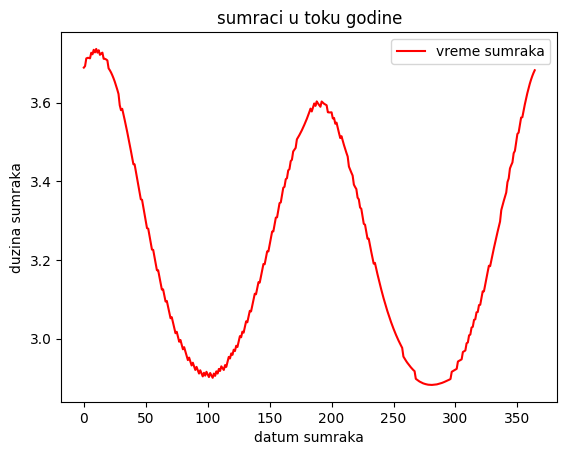

In [9]:
plt.figure()
plt.title('sumraci u toku godine')
plt.plot(datum, kriva1, color = 'r', label = 'vreme sumraka')

plt.xlabel('datum sumraka')
plt.ylabel('duzina sumraka')
plt.legend()
plt.show()

## Mesec

##### 9. Za trenutnog posmatraca u Beogradu odstampati trenutke lokalnog vremena za:
- Prethodni i sledeci pun Mesec
- Prethodni i sledeci mladi Mesec
- Prethodni i sledeci izlazak Meseca
- Prethodni i sledeci zalazak Meseca

In [8]:
posmatrac = ephem.Observer()
posmatrac.lat, posmatrac.lon = '44.8125', '20.4612'
date = ephem.Date('2023/12/14 10:00')
posmatrac.date = date
moon = ephem.Moon()
moon.compute(posmatrac)

print("prethodni pun Mesec:")
print(ephem.previous_full_moon(date))
print("sledeci pun Mesec:")
print(ephem.next_full_moon(date))

print("prethodni mlad Mesec:")
print(ephem.previous_new_moon(date))
print("sledeci mlad Mesec:")
print(ephem.next_new_moon(date))

print("prethodni izlazak Meseca:")
print(posmatrac.previous_rising(moon,date))
print("sledeci zalazak Meseca:")
print(posmatrac.next_rising(moon,date))

print("prethodni izlazak Meseca:")
print(posmatrac.previous_setting(moon,date))
print("sledeci zalazak Meseca:")
print(posmatrac.next_setting(moon,date))

prethodni pun Mesec:
2023/11/27 09:16:17
sledeci pun Mesec:
2023/12/27 00:33:10
prethodni mlad Mesec:
2023/12/12 23:32:00
sledeci mlad Mesec:
2024/1/11 11:57:22
prethodni izlazak Meseca:
2023/12/14 07:59:22
sledeci zalazak Meseca:
2023/12/15 08:50:41
prethodni izlazak Meseca:
2023/12/13 14:59:51
sledeci zalazak Meseca:
2023/12/14 16:05:26


##### 10. Odrediti polozaj Meseca u horizontskom koordinatnom sistemu u narednih 24 casa za svaki sat i prikazati na grafiku.

In [38]:
posmatrac = ephem.Observer()
posmatrac.lat, posmatrac.lon = '44.8125', '20.4612'
date = ephem.Date('2023/2/14 22:00')
posmatrac.date = date
moon = ephem.Moon()
moon.compute(posmatrac)

azimut = []
visina = []
azimut_s = []
visina_s = []

for i in range(24):
    moon.compute(posmatrac)
    azimut.append(moon.az)
    visina.append(moon.alt)
    sun.compute(posmatrac)
    azimut_s.append(sun.az)
    visina_s.append(sun.alt)
    posmatrac.date = ephem.date(posmatrac.date + ephem.hour)


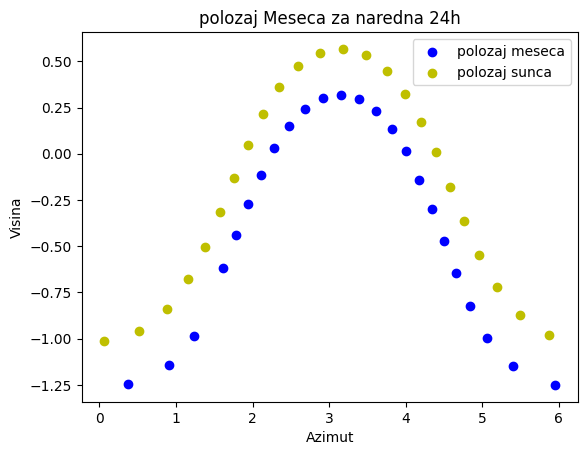

In [39]:
plt.figure()
plt.title('polozaj Meseca za naredna 24h')

plt.scatter(azimut, visina, color = 'b', label = 'polozaj meseca')
plt.scatter(azimut_s, visina_s, color = 'y', label = 'polozaj sunca')

plt.xlabel('Azimut')
plt.ylabel('Visina')
plt.legend()
plt.show()

##### 11. Odrediti koordinate u horizontskom sistemu za Mesec u toku tekuceg meseca i prikazati faze Meseca koristeci se moon phase.ttf fontom i pored svake faze ispisati redni broj dana u mesecu. Pomoc: povezati karaktere slova i brojeva kojima su definisane faze u fontu sa trenutkom u toku jednog lunarnog ciklusa.

In [11]:
import string
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

posmatrac = ephem.Observer()
posmatrac.lat, posmatrac.lon = '44.8125', '20.4612'
date = ephem.Date('2023/12/1 10:00')
posmatrac.date = date
moon = ephem.Moon()
moon.compute(posmatrac)

azimut = []
visina = []
mesec = []
faze = []
faze = list(string.ascii_uppercase*2)
#ubacivanje indeksa
faze.insert(0,"0")
faze.insert(14, "9")
faze.insert(28,"0")
faze.insert(42, "9")

d = ephem.previous_full_moon(date)
posmatrac.date = ephem.previous_full_moon(date)

#povezivanje faza i datuma
for i in range(len(faze)):
    mesec.append((faze[i],ephem.localtime(posmatrac.date)))
    posmatrac.date += 1

#visine i azimuti
for i in range(24):
    moon.compute(posmatrac)
    azimut.append(moon.az)
    visina.append(moon.alt)
    posmatrac.date = ephem.date(posmatrac.date + 24*ephem.hour)



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/usr/local/opt/ipython/libexec/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 57 (9) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


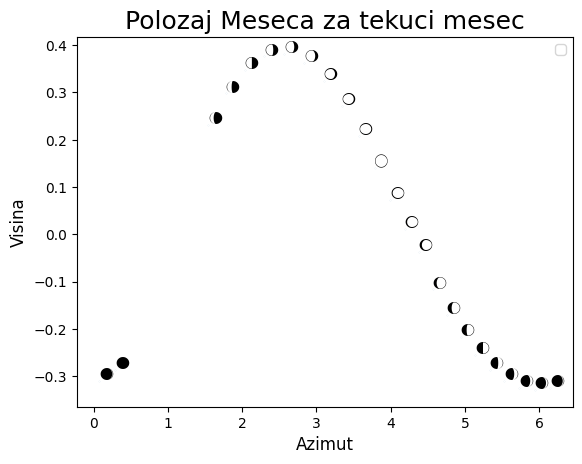

In [12]:
font_path = 'moon_phases.ttf'
moon_phases_font = fm.FontProperties(fname=font_path)

plt.figure()
plt.title('Polozaj Meseca za tekuci mesec', fontsize=18)

plt.scatter(azimut, visina, s = 0.001)#, label='Polozaj meseca')
for i in range(24):
  plt.text(azimut[i], visina[i], faze[i], fontproperties=moon_phases_font)
  #plt.text(azimut[i], visina[i]-0.05, #vreme u satima i minutama)




plt.xlabel('Azimut', fontsize=12)
plt.ylabel('Visina', fontsize=12)
plt.legend()
plt.show()